In [1]:
import pandas as pd
dataset = pd.read_csv('/Users/adi/Desktop/TA_Adi_V2/QE Statistik V2/logistic_regression/dataset/kriminalitas.csv')
dataset.fillna(dataset.mean(), inplace = True)

/var/folders/tl/qtfjbsjd2f3f54prw95dl_5m0000gn/T/ipykernel_75465/3905213658.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


In [2]:
dataset.drop('No Document', axis=1, inplace=True)
dataset.drop('title', axis=1, inplace=True)
dataset.drop('Description', axis=1, inplace=True)
dataset=dataset.dropna(axis=0)

In [6]:
dataset['Mati']=dataset.Mati.astype(int)
dataset['Luka']=dataset.Luka.astype(int)
dataset['KerugianBarang']=dataset.KerugianBarang.astype(int)
dataset['KerugianUang']=dataset.KerugianUang.astype(int)
dataset['Pemerkosaan']=dataset.Pemerkosaan.astype(int)
dataset['Keparahan']=dataset.Keparahan.astype(str)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 0 to 1206
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mati            1125 non-null   int64 
 1   Luka            1125 non-null   int64 
 2   KerugianBarang  1125 non-null   int64 
 3   KerugianUang    1125 non-null   int64 
 4   Pemerkosaan     1125 non-null   int64 
 5   Keparahan       1125 non-null   object
dtypes: int64(5), object(1)
memory usage: 61.5+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Mati'] = LE.fit_transform(dataset['Mati'])
LE = LabelEncoder()
dataset['Luka'] = LE.fit_transform(dataset['Luka'])
LE = LabelEncoder()
dataset['KerugianBarang'] = LE.fit_transform(dataset['KerugianBarang'])
LE = LabelEncoder()
dataset['KerugianUang'] = LE.fit_transform(dataset['KerugianUang'])
LE = LabelEncoder()
dataset['Pemerkosaan'] = LE.fit_transform(dataset['Pemerkosaan'])
X = dataset.drop(['Keparahan'], axis = 1)
y = dataset['Keparahan']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
logreg = LogisticRegression(max_iter=3000, solver='lbfgs')
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [11]:
print("Train acccuracy: ",logreg.score(X_train,y_train))
print("Test acccuracy: ",logreg.score(X_test,y_test))

Train acccuracy:  0.9388888888888889
Test acccuracy:  0.9111111111111111


In [12]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

      Rendah       0.84      1.00      0.92        76
      Sedang       0.78      0.48      0.60        29
       Tiggi       1.00      1.00      1.00        89
      Tinggi       0.93      0.84      0.88        31

    accuracy                           0.91       225
   macro avg       0.89      0.83      0.85       225
weighted avg       0.91      0.91      0.90       225



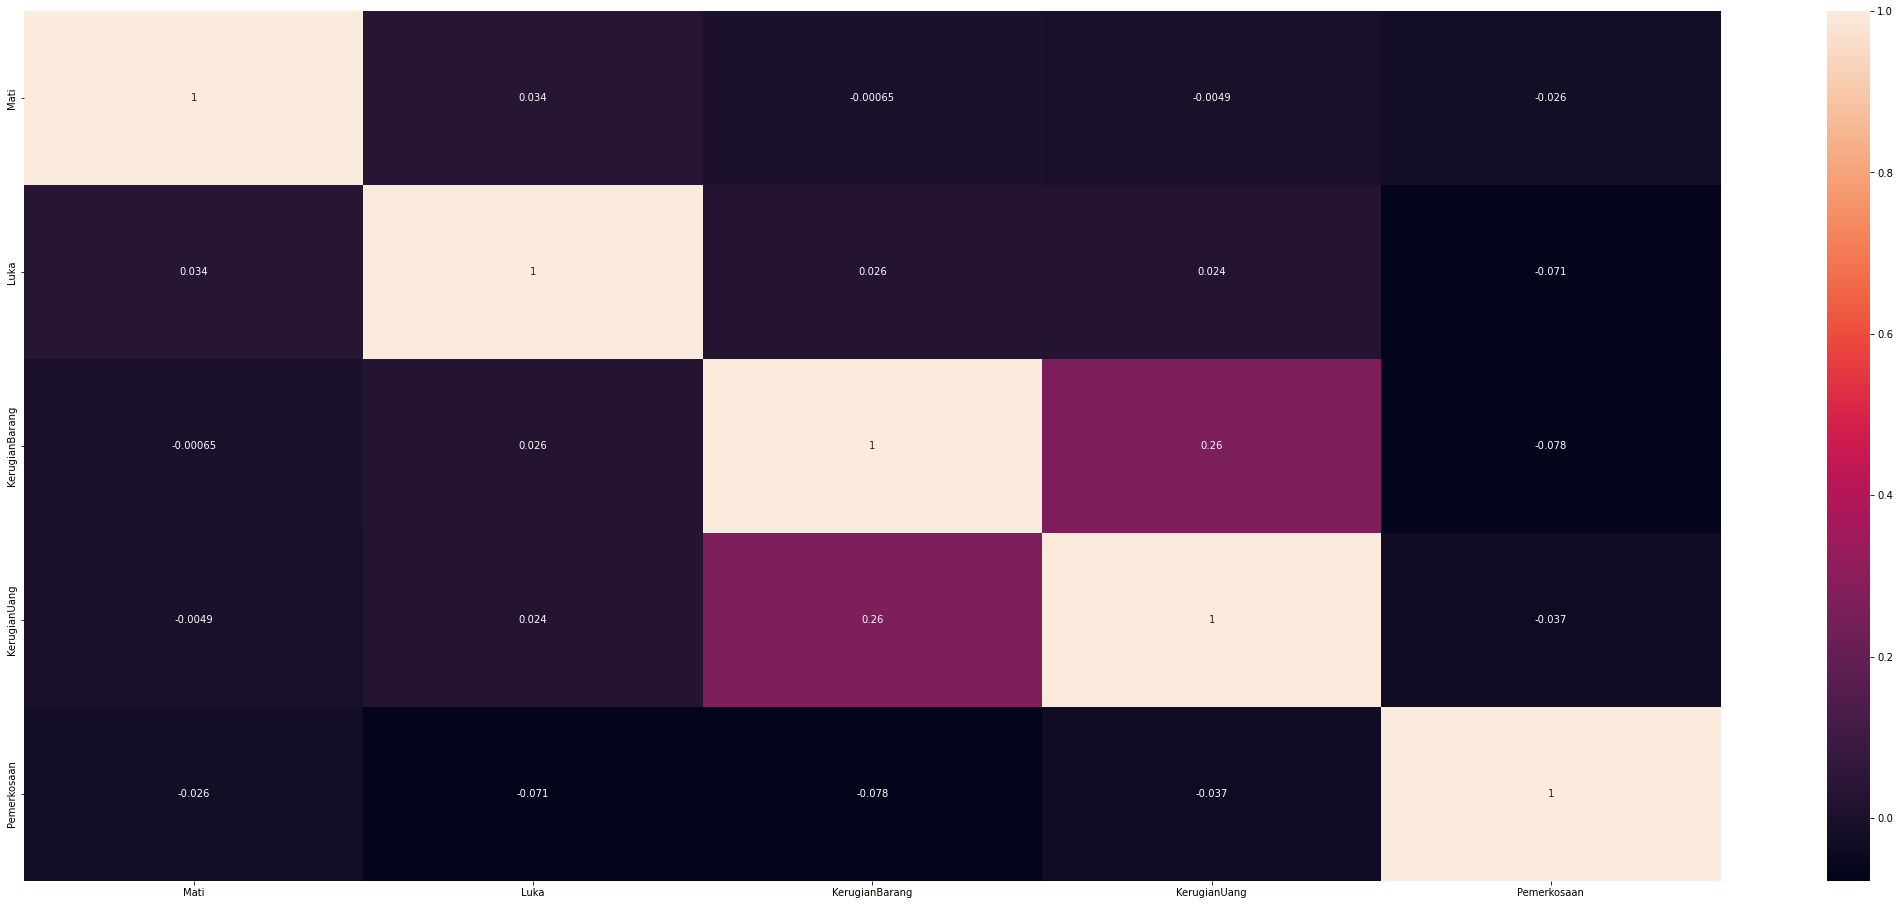

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (38,16))
sns.heatmap(dataset.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

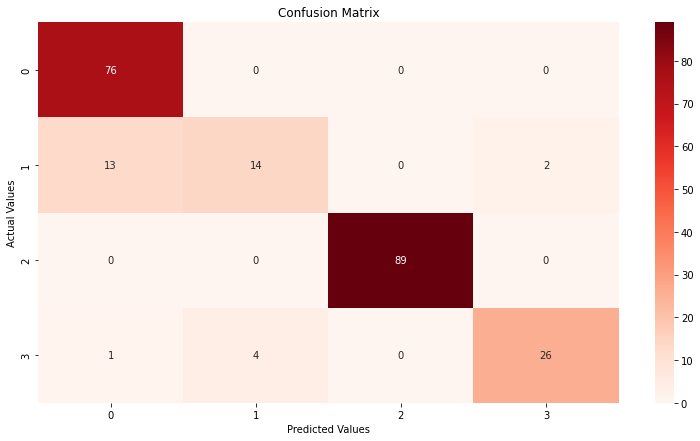

In [14]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(13,7))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')